**Table of contents**<a id='toc0_'></a>    
- [1장](#toc1_)    
  - [탐색적 분석](#toc1_1_)    
- [2장 : 전처리](#toc2_)    
    - [시각화 방법을 포함, 결측치와 이상치를 확인하고 합리적 전처리를 진행하시오.](#toc2_1_1_)    
- [3장 : 데이터 분할 및 교차검증](#toc3_)    
- [4장 : 확률분포](#toc4_)    
    - [정중앙 맞힐 확률이 0.8. 총 5번 사격 시 정중앙 맞힐 확률](#toc4_1_1_)    
    - [11시 전에 잘 확률 0.4. 임의 선택 10명 중 3명이 11시 전에 잘 확률](#toc4_1_2_)    
    - [11시부터 2시 사이 시간 당 평균 배달 건수 5건. 배달 건수가 포아송 분포를 따를 때, 12시부터 1시 사이 배달이 1건만 발생할 확률](#toc4_1_3_)    
    - [시험 성적 분포가 평균 65, 표준편차 12. 상위 10%를 A라고 할 때, A 받기 위한 최소 점수는?](#toc4_1_4_)    
- [8장 회귀분석](#toc5_)    
  - [선형 회귀분석 시행](#toc5_1_)    
    - [1-1 전처리 및 선형회귀분석](#toc5_1_1_)    
    - [1-2 교호작용항 검토](#toc5_1_2_)    
    - [1-3 다항 검토](#toc5_1_3_)    
    - [1-4 변수선택 검토](#toc5_1_4_)    
- [10장. 비지도 학습](#toc6_)    
    - [2가지 군집분석 알고리즘으로 군집을 생성하고, 군집 생성과정 설명](#toc6_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[1장](#toc0_)

## <a id='toc1_1_'></a>[탐색적 분석](#toc0_)
- 입력변수 : 고객 정보
- 출력변수 : 정기예금 가입 여부

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice1_bank.csv')
df[:3]

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no


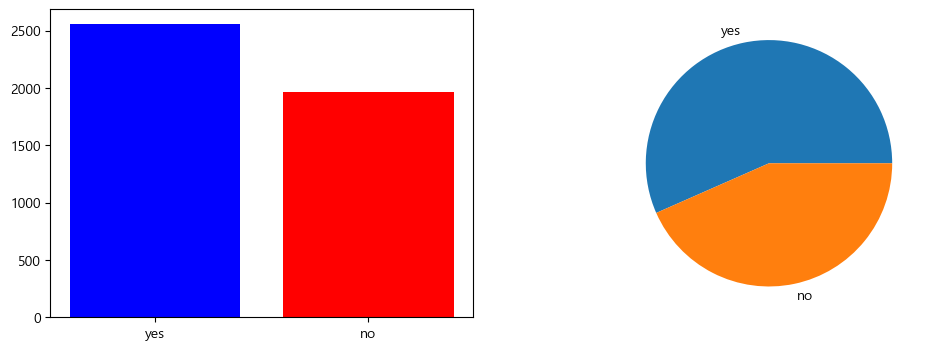

In [5]:
housedf = df.housing.copy()
freq = housedf.value_counts().reset_index().rename(columns={'count':'도수'})

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(freq.housing, freq.도수, color=['blue', 'red'])
ax[1].pie(freq.도수, labels=freq.housing)

plt.show()


<Axes: ylabel='count'>

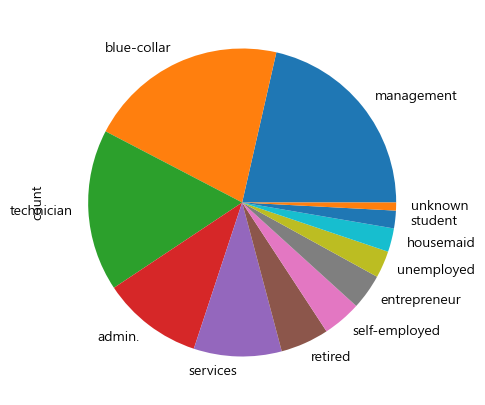

In [6]:
freq = df.job.value_counts()
freq.plot.pie()

<Axes: >

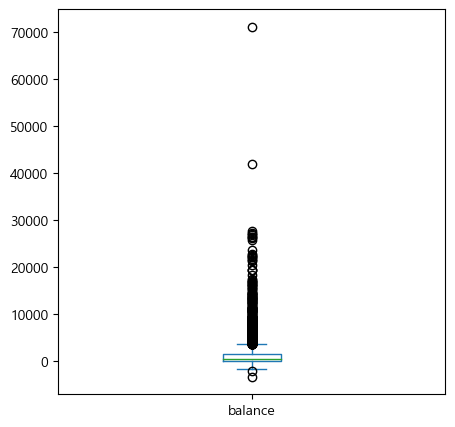

In [7]:
df.balance.plot.box()

[]

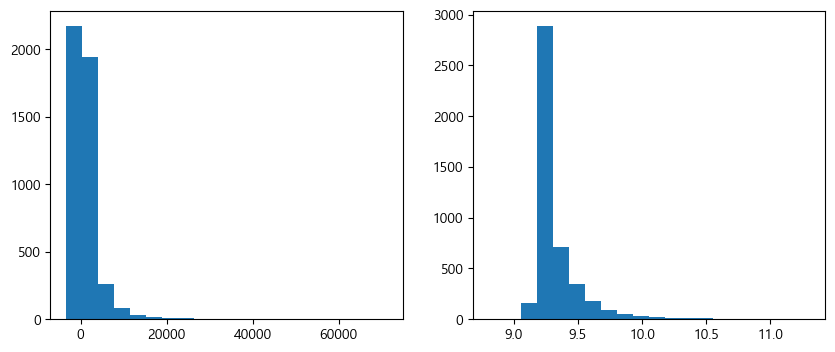

In [8]:
temp = df.balance.copy()
temp.dropna()

fig, ax = plt.subplots(1, 2, figsize=(10,4))

ax[0].hist(temp, bins=20)
ax[1].hist(np.log(temp+10000), bins=20)

plt.plot()

In [9]:
df.education.value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

In [10]:
map_edu_level = {
    'primary': 1,
    'secondary': 2,
    'tertiary': 3,
}

map_yes_no = {
    'no' : 0,
    'yes' : 1
}

marital_yes_no = {
    'single' : 0,
    'married' : 1,
    'divorced' : 2
}

In [11]:
df[:2]

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no


In [12]:
testdf = df[['age', 'marital', 'education', 'balance', 'housing', 'loan']].copy()

In [13]:
testdf[:2]

,age,marital,education,balance,housing,loan
0,30,married,primary,1787,no,no
1,33,married,secondary,4789,yes,yes


In [14]:
testdf.marital.value_counts()

marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64

In [15]:
df[:3]

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no


balance    Axes(0.125,0.11;0.775x0.77)
dtype: object

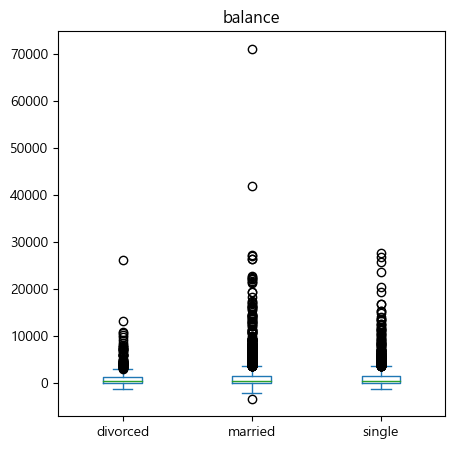

In [16]:
# 결혼 상태와 balance의 상관관계

# 결혼 상태는 기혼, 미혼, 이혼 상태로 나뉜다. 각각을 boxplot으로 나타내보자.
df.plot.box(column='balance', by='marital')

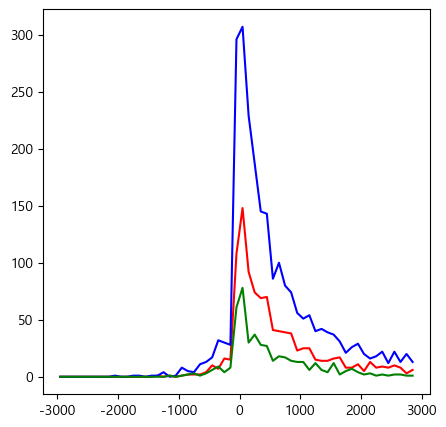

In [17]:
# 이 상태를 좀 더 가시화해보자. 결혼 상태별로 도수분포를 표현해보자.
retsingle = pd.cut(df[df.marital=='single'].balance, bins=[i for i in range(-3000, 3000, 100)])
frqsingle = pd.DataFrame(retsingle).value_counts().reset_index().rename(columns={'balance':'계급', 'count':'도수'}).sort_values(by='계급')
frqsingle['계급값'] = frqsingle.계급.apply(lambda x: np.median([x.left, x.right])).astype(float)

retmarried = pd.cut(df[df.marital=='married'].balance, bins=[i for i in range(-3000, 3000, 100)])
frqmarried = pd.DataFrame(retmarried).value_counts().reset_index().rename(columns={'balance':'계급', 'count':'도수'}).sort_values(by='계급')
frqmarried['계급값'] = frqmarried.계급.apply(lambda x: np.median([x.left, x.right])).astype(float)

retdivorced = pd.cut(df[df.marital=='divorced'].balance, bins=[i for i in range(-3000, 3000, 100)])
frqdivorced = pd.DataFrame(retdivorced).value_counts().reset_index().rename(columns={'balance':'계급', 'count':'도수'}).sort_values(by='계급')
frqdivorced['계급값'] = frqdivorced.계급.apply(lambda x: np.median([x.left, x.right]))

plt.plot(frqsingle.계급값, frqsingle.도수, color='red',)
plt.plot(frqmarried.계급값, frqmarried.도수, color='blue')
plt.plot(frqdivorced.계급값, frqdivorced.도수, color='green')

plt.show()

In [18]:
# 교육 상태와 balance의 상관관계
frqsingle

,계급,도수,계급값
58,"(-3000, -2900]",0,-2950.0
44,"(-2900, -2800]",0,-2850.0
48,"(-2800, -2700]",0,-2750.0
46,"(-2700, -2600]",0,-2650.0
45,"(-2600, -2500]",0,-2550.0
41,"(-2500, -2400]",0,-2450.0
43,"(-2400, -2300]",0,-2350.0
42,"(-2300, -2200]",0,-2250.0
47,"(-2200, -2100]",0,-2150.0
50,"(-2100, -2000]",0,-2050.0


In [19]:
# 직업과 balance의 상관관계
testdf = df[['education', 'balance', 'housing', 'loan', 'y']].copy()
testdf['educat'] = df.education.map(map_edu_level)
testdf['housecat'] = df.housing.map({'no':0, 'yes':1})
testdf['loancat'] = df.housing.map({'no':0, 'yes':1})
testdf['ycat'] = df.y.map({'no':0, 'yes':1})

testdf.dropna(inplace=True)

from scipy.stats import pearsonr, spearmanr

corr, pvalue = pearsonr(testdf.balance, testdf.educat)
print('교육수준과 잔고의 상관관계는 {:.3f} p-value {:.3f}'.format(corr, pvalue))

corr, pvalue = pearsonr(testdf.balance, testdf.housecat)
print('자가주택과 잔고의 상관관계는 {:.3f} p-value {:.3f}'.format(corr, pvalue))

corr, pvalue = pearsonr(testdf.balance, testdf.loancat)
print('대출과 잔고의 상관관계는 {:.3f} p-value {:.3f}'.format(corr, pvalue))

corr, pvalue = spearmanr(testdf.housecat, testdf.loancat)
print('자가주택과 대출의 상관관계는 {:.3f} p-value {:.3f}'.format(corr, pvalue))

교육수준과 잔고의 상관관계는 0.057 p-value 0.000
자가주택과 잔고의 상관관계는 -0.051 p-value 0.001
대출과 잔고의 상관관계는 -0.051 p-value 0.001
자가주택과 대출의 상관관계는 1.000 p-value 0.000


balance    Axes(0.125,0.11;0.775x0.77)
dtype: object

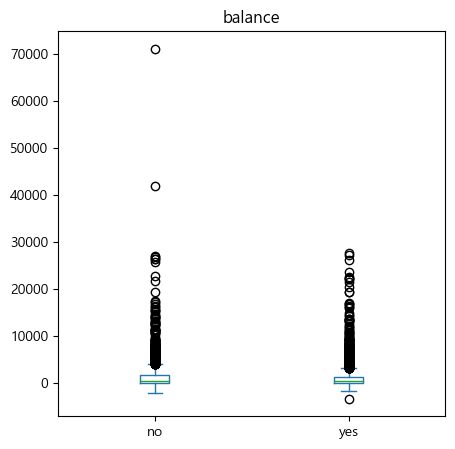

In [20]:
testdf.plot.box(column = 'balance', by='housing')

In [21]:
testdf.drop(['education', 'housing', 'loan', 'y'], axis=1, inplace=True)

In [22]:
testdf

,balance,educat,housecat,loancat,ycat
0,1787,1.0,0,0,0
1,4789,2.0,1,1,0
2,1350,3.0,1,1,0
3,1476,3.0,1,1,0
4,0,2.0,1,1,0
...,...,...,...,...,...
4516,-333,2.0,1,1,0
4517,-3313,3.0,1,1,0
4518,295,2.0,0,0,0
4519,1137,2.0,0,0,0


In [23]:
X = testdf[['balance','educat','housecat','loancat']]
y = testdf.ycat

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)

In [24]:
from sklearn.linear_model import SGDClassifier

cls = SGDClassifier()
cls.fit(X_train, y_train)
cls.score(X_test, y_test)

0.8717712177121771

In [25]:
cls.coef_

array([[ -13.05095806, -873.39723218, -523.56375901, -523.56375901]])

<Axes: xlabel='feature'>

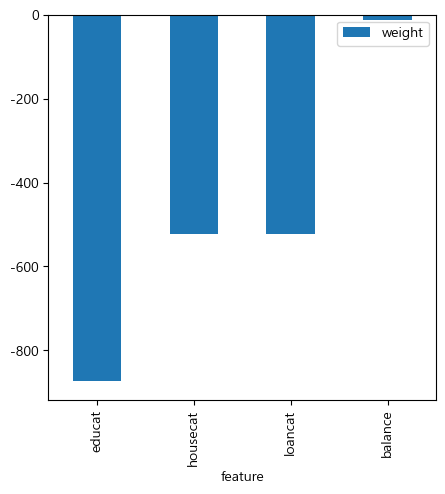

In [26]:
retdf = pd.DataFrame({'feature':X.columns, 'weight':cls.coef_[0].round(2)})
retdf.sort_values(by='weight', inplace=True)

retdf.plot.bar(x='feature', y='weight')

In [27]:
corr, pvalue = pearsonr(X.educat, y)
print(corr, pvalue)

0.05536795053429206 0.0002655356298198508


In [28]:
print( testdf[testdf.ycat==1].educat.mean() ) 
print( testdf[testdf.ycat==0].educat.mean() ) 

2.256972111553785
2.1417014613778704


In [29]:
X = testdf[['balance','educat','housecat','loancat']].copy()
y = testdf.ycat.copy()

from sklearn.preprocessing import StandardScaler

scale1 = StandardScaler()

temp = np.log(X.balance+3314)
X.balance = scale1.fit_transform(temp.values.reshape(-1,1))

scale2 = StandardScaler()
X.educat = scale2.fit_transform(X.educat.values.reshape(-1,1))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)

cls = SGDClassifier()
cls.fit(X_train, y_train)
cls.score(X_test, y_test)

0.8856088560885609

<Axes: xlabel='feature'>

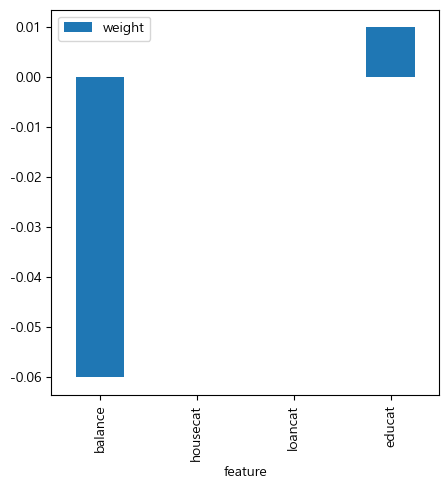

In [31]:
retdf = pd.DataFrame({'feature':X.columns, 'weight':cls.coef_[0].round(2)})
retdf.sort_values(by='weight', inplace=True)

retdf.plot.bar(x='feature', y='weight')

In [32]:
X

,balance,educat,housecat,loancat
0,0.434104,-1.733668,0,0
1,1.602828,-0.232726,1,1
2,0.207927,1.268217,1,1
3,0.275245,1.268217,1,1
4,-0.655027,-0.232726,1,1
...,...,...,...,...
4516,-0.922454,-0.232726,1,1
4517,-21.125232,1.268217,1,1
4518,-0.439679,-0.232726,0,0
4519,0.089881,-0.232726,0,0


In [33]:
inc_ratio = [4, 3, 5, 10, 8]
np.mean(inc_ratio)

6.0

* 햄버거
  - 평균 200g, 분산 49g 정규분포
* 샌드위치
  - 평균 190g, 분산 36g 정규분포

지금 산 햄버거와 샌드위치가 모두 210g이라면 상대적으로 더 묵직한 것은?

이 문제는 표준화에 관한 문제다. 
평균과 퍼짐만 다를 뿐 같은 정규분포를 가정해야 어느 쪽이 더 발생확률이 낮은지 평가할 수 있다.
이 것을 계산하기 위해서 하는 것이 표준화 점수를 구하는 것이다.

표준화점수 = 점수 - 평균 / 표준편차

In [35]:
ham = (210 - 200) / np.sqrt(49)
san = (210 - 190) / np.sqrt(36)

print("{:.3f}, {:.3f}".format(ham, san))

1.429, 3.333


* A학교
  - 평균 10, 표준편차2 정규분포
* B학교
  - 평균 8, 표준편차1 정규분포

용돈 격차가 더 심한 곳은?

예를 들어 평균이 10인데 표준편차가 5인 경우과 평균이 100인데 표준편차가 5인 경우가 있다고 하면, 평균이 10인 경우가 더 상대적으로 편차가 크다고 볼 수 있다.
이를 평가하기 위한 것이 변동계수이다. 변동계수는 편차 1의 상대적 의미를 보면 된다. 즉, 편차 1 당 분포의 너비를 본다

In [36]:
print(2/10)
print(1/8)

0.2
0.125


# <a id='toc2_'></a>[2장 : 전처리](#toc0_)

- default:신용불이행 여부
- housing:부동산 대출 여부
- loan : 개인대출 여부
- month : 마지막으로 연락한 달
- [출력변수] y : 정기예금 가입 여부

### <a id='toc2_1_1_'></a>[시각화 방법을 포함, 결측치와 이상치를 확인하고 합리적 전처리를 진행하시오.](#toc0_)
- 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgeun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline

df1 = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice1_bank.csv')
df1[:3]

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  y          4521 non-null   object
dtypes: int64(2), object(9)
memory usage: 388.7+ KB


In [11]:
num_cols = []
for col in df1.columns:
    if df1[col].dtype == 'object' :
        print("%s : %d" %(col, df1[col].nunique()))
    else:
        num_cols.append(col)

print('numeric columns are : ', num_cols)

job : 12
marital : 3
education : 4
default : 2
housing : 2
loan : 2
contact : 3
month : 12
y : 2
numeric columns are :  ['age', 'balance']


In [6]:
# 이상치 처리
# 이상치 절단 함수정의
def del_outlier(df, columns, method):
    columns = np.array(columns).flatten().tolist()
    check_df = df.loc[:,columns]
    if method=='iqr':
        IQR = check_df.quantile(0.75) - check_df.quantile(0.25)
        top = check_df.quantile(0.75) + 1.5*IQR
        dwn = check_df.quantile(0.25) - 1.5*IQR
    elif method == 'esd':
        std = check_df.std()
        mean = check_df.mean()
        top = mean+std*3
        dwn = mean-std*3
    prep_dfs = []
    for col in columns:
        out_id = check_df[ (check_df[col] >= top[col]) | (check_df[col] <= dwn[col]) ][col].index
        check_df.drop(out_id, axis=0, inplace=True)
        prep_dfs.append(check_df[[col]])
    if len(prep_dfs) == 1:
        prep_dfs = prep_dfs[0]
    return prep_dfs

#이상치 처리 전후 시각화 함수 정의
def before_after_boxplot(df1, df2, figsize=(10,5), fontsize=13):
    import matplotlib.pyplot as plt
    fig, axes = plt.subplots(1,2)
    plt.rcParams['figure.figsize']=figsize
    plt.rcParams['font.size']=fontsize
    plt.rcParams['axes.unicode_minus']=False
    for data, ax, title in zip([df1, df2], axes, ['Before', 'After']):
        data.boxplot(ax=ax)
        ax.set_title('{} ({})'.format(title, len(data)))
        margin = df1.std().values[0]/2
        ax.set_ylim(df1.min().values[0]-margin, df1.max().values[0]+margin)
    plt.show()  

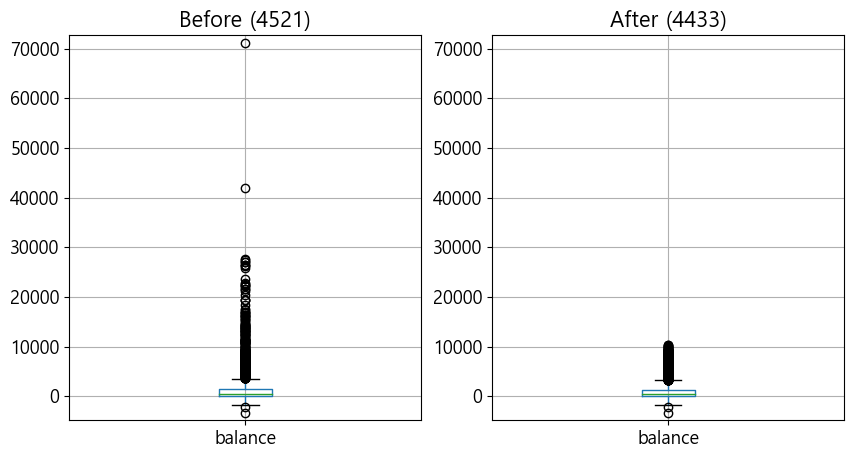

In [15]:
prep_df = del_outlier(df1, ['balance'], 'esd')
before_after_boxplot(pd.DataFrame(df1.balance), pd.DataFrame(prep_df.balance))

In [5]:
# 범주형 변수 인코딩으로 생각해볼 수 있는 방법은 2가지다. one-hot encoding과 label encoding이다.
# 선형모델을 사용할 거라면 변수를 줄이는 one-hot encoding인 get_dummies를 사용하는 것이 좋겠고,
# 트리모델을 사용할 거라면 그대로 두거나 혹은 label encoding을 적용할 수도 있다.
testdf = df1.copy()
testdf.drop(['balance', 'age'], axis=1, inplace=True)

bin_cols = pd.get_dummies(testdf[['job','marital','education','contact', 'month']])

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
testdf.y = le.fit_transform(testdf.y)
testdf.default = le.fit_transform(testdf.default)
testdf.housing = le.fit_transform(testdf.housing)
testdf.loan = le.fit_transform(testdf.loan)

In [6]:
testdf.drop(['job','marital','education','contact', 'month'], axis=1, inplace=True)
testdf = pd.concat([testdf, bin_cols], axis=1)

In [7]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

pt_box = PowerTransformer(method='yeo-johnson')
scaler = StandardScaler()

testdf['balance'] = pt_box.fit_transform(df1[['balance']])
testdf['age'] = scaler.fit_transform(pd.DataFrame(df1.age))

testdf

,default,housing,loan,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,balance,age
0,0,0,0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,0.282211,-1.056270
1,0,1,1,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,1.209846,-0.772583
2,0,1,0,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,0.130429,-0.583458
3,0,1,1,0,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,0.174936,-1.056270
4,0,1,0,0,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,-0.445382,1.686036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,1,0,0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,-1.340442,-0.772583
4517,1,1,1,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,-13.487834,1.496912
4518,0,0,0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,-0.283836,1.496912
4519,0,0,0,0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0.053555,-1.245394


In [8]:
testdf.y.value_counts()

y
0    4000
1     521
Name: count, dtype: int64

In [17]:
valcount = testdf.y.value_counts()
print('0''s count is %d. it''s %.2f %%' %(valcount[0], valcount[0]/testdf.y.count()*100))
print('1''s count is %d. it''s %.2f %%' %(valcount[1], valcount[1]/testdf.y.count()*100))

0s count is 4000. its 88.48 %
1s count is 521. its 11.52 %


In [19]:
features = testdf.copy()
features.drop(['y'], axis=1, inplace=True)

target = testdf.y.copy()

In [40]:
# 일반 K-MEANS 기반 SMOTE
# 소수클래스에 해당하는 데이터 주위에 k개의 이웃을 찾고, 그 데이터와 이웃 사이에 새로운 데이터를 생성하는 방법
from collections import Counter
from imblearn.over_sampling import ADASYN, SVMSMOTE

ad_os = ADASYN(random_state=1, n_neighbors=4)
ad_feat, ad_targ = ad_os.fit_resample(features, target)

print('ADASYN 처리 전 target 분포 : %s' %Counter(target))
print('ADASYN 처리 후 target 분포 : %s' %Counter(ad_targ))

sv_os = SVMSMOTE(random_state=1)
sv_feat, sv_targ = sv_os.fit_resample(features, target)

print('처리 전 target 분포 : %s' %Counter(target))
print('처리 후 target 분포 : %s' %Counter(sv_targ))
 

ADASYN 처리 전 target 분포 : Counter({0: 4000, 1: 521})
ADASYN 처리 후 target 분포 : Counter({1: 4033, 0: 4000})
처리 전 target 분포 : Counter({0: 4000, 1: 521})
처리 후 target 분포 : Counter({0: 4000, 1: 4000})


# <a id='toc3_'></a>[3장 : 데이터 분할 및 교차검증](#toc0_)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgeun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 5)

%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice1_bank.csv')
df[:3]

,age,job,marital,education,default,balance,housing,loan,contact,month,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,no


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  y          4521 non-null   object
dtypes: int64(2), object(9)
memory usage: 388.7+ KB


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

dft = df.copy()
obj_cols = dft.columns[dft.dtypes=='object']

for col in obj_cols :
    le = LabelEncoder()
    dft[col] = le.fit_transform(dft[col])

X = dft.drop(['y'], axis=1)
y = dft.y

skfold = StratifiedKFold(n_splits=4, shuffle=False)
rfc = RandomForestClassifier()

param_grid = {'n_estimators':[12, 16],
              'max_depth':[12, 14],
              'min_samples_leaf':[10, 12],
              'min_samples_split':[8, 10]}

grid = GridSearchCV(rfc, param_grid, cv=skfold)
grid.fit(X, y)

print('최고점수: {:.2f}'.format(grid.best_score_))
print('최적param: {}'.format(grid.best_params_))

최고점수: 0.89
최적param: {'max_depth': 14, 'min_samples_leaf': 12, 'min_samples_split': 10, 'n_estimators': 12}


In [26]:
y.info()


<class 'pandas.core.series.Series'>
RangeIndex: 4521 entries, 0 to 4520
Series name: y
Non-Null Count  Dtype
--------------  -----
4521 non-null   int32
dtypes: int32(1)
memory usage: 17.8 KB


# <a id='toc4_'></a>[4장 : 확률분포](#toc0_)

- pmf() : probability mass function
- cdf() : cumulative distribution function
- ppf() : percent point function

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['figure.figsize'] = (12, 5)


%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


### <a id='toc4_1_1_'></a>[정중앙 맞힐 확률이 0.8. 총 5번 사격 시 정중앙 맞힐 확률](#toc0_)
- p = 0.4인 베르누이 시행을 5번 했을 때 확률이므로 이항분포 적용

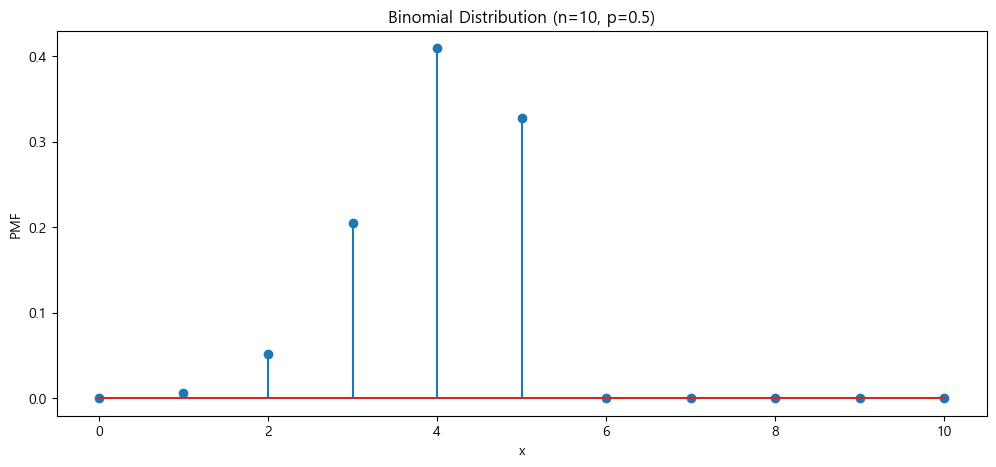

In [19]:
n = 5   #시행 회수
p = 0.8 #정중앙 맞힐 확률

from scipy.stats import binom

bn_dist = binom(5, 0.8)

x = np.arange(0, 11)
pmf = bn_dist.pmf(x)

# 확률 질량 함수 그래프
plt.stem(x, pmf)
plt.xlabel('x')
plt.ylabel('PMF')
plt.title('Binomial Distribution (n=10, p=0.5)')
plt.show()

### <a id='toc4_1_2_'></a>[11시 전에 잘 확률 0.4. 임의 선택 10명 중 3명이 11시 전에 잘 확률](#toc0_)
- p = 0.4인 베르누이 시행을 10번 시행했을 때, 3번 성공할 확률

In [20]:
# A의 승률이 0.3이라면, 5번째 경기에서 2번째로 이길 확률은?
from scipy.stats import binom
import math

n = 10   #총 시행회수
k = 3   #총 성공회수
p = 0.4 #성공 확률

nb = binom.pmf(3, 10, 0.4)

print(nb)

0.21499084799999987


### <a id='toc4_1_3_'></a>[11시부터 2시 사이 시간 당 평균 배달 건수 5건. 배달 건수가 포아송 분포를 따를 때, 12시부터 1시 사이 배달이 1건만 발생할 확률](#toc0_)
- 사건의 시간 당 평균발생 회수(lambda)가 5회일 때 사건 발생이 1일 확률이므로 포아송 분포 적용

In [21]:
# 주말 저녁 시간 당 평균 6명이 응급실. 어떤 주말 저녁 30분 내 4명이 응급실 들어올 확률
from scipy.stats import poisson
import math

x = 1   #구간 내 사건회수  --> 확률변수
lam = 5 #구간 내 평균 (lambda)

print(poisson.pmf(x, lam))

0.03368973499542734


### <a id='toc4_1_4_'></a>[시험 성적 분포가 평균 65, 표준편차 12. 상위 10%를 A라고 할 때, A 받기 위한 최소 점수는?](#toc0_)
- 정규분포 적용

In [23]:
from scipy.stats import norm
import numpy as np

mu = 65
sigma = 12
z = norm.ppf(0.9)

print(sigma * z + mu) 

80.3786187865352


# <a id='toc5_'></a>[8장 회귀분석](#toc0_)

## <a id='toc5_1_'></a>[선형 회귀분석 시행](#toc0_)

### <a id='toc5_1_1_'></a>[1-1 전처리 및 선형회귀분석](#toc0_)
- 인도 벵갈루루 집값 데이터
    - availability : 입주가능 여부
    - size : 집크기 등급 (rk:Room Kitchen, BHK:Bedroom Hall Kitchen)
    - bath : 화장실 개수
    - balcony : 발코니 개수
    - total_sqft : 전체면적
    - area_type : Carpet, Plot, Super built-up, built-up
    - price : 집 가격

In [75]:
import pandas as pd
#real = pd.read_csv('https://raw.githubusercontent.com/blueage98/ML/main/BHP.csv')
data = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice8_BHP2.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     7495 non-null   object 
 1   availability  7495 non-null   int64  
 2   size          7495 non-null   int64  
 3   total_sqft    7495 non-null   float64
 4   bath          7495 non-null   int64  
 5   balcony       7495 non-null   int64  
 6   price         7495 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 410.0+ KB


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

real = pd.get_dummies(data, columns=['area_type'], drop_first=True)
real.area_type_Carpet = real.area_type_Carpet.astype('int')
real.area_type_Plot = real.area_type_Plot.astype('int')
real.area_type_Super = real.area_type_Super.astype('int')

y = real.price
X = real.drop(['price'], axis=1)
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

# sklearn 방식
lr = LinearRegression()
lr.fit(X_train, y_train)
print('sklearn 사용 시 : {:.3f}'.format(lr.score(X_test, y_test)))

# OLS 방식
model = sm.OLS(y_train, X_train)
fitted = model.fit()
pred = fitted.predict(X_test)
print('OLS 사용 시 : {:.3f}'.format(r2_score(y_test, pred)))

sklearn 사용 시 : 0.616
OLS 사용 시 : 0.616


### <a id='toc5_1_2_'></a>[1-2 교호작용항 검토](#toc0_)
- area_type과 total_sqft의 교호작용항을 추가하여 회귀분석 수행

In [91]:
# area_type과 total_sqft의 교호작용항을 추가한 X_train2, X_test2 생성
X_train2, X_test2 = X_train.copy(), X_test.copy()
for col in ['area_type_Carpet', 'area_type_Plot', 'area_type_Super']:
    X_train2[f'at_{col[10:]}:total_sqft'] = X_train[col] * X_train['total_sqft']
    X_test2[f'at_{col[10:]}:total_sqft'] = X_test[col] * X_test['total_sqft']

# 신규 feature를 생성한 데이터로 선형회귀분석 시행
model2 = sm.OLS(y_train, X_train2)
fitted2 = model2.fit()

pred2 = fitted2.predict(X_test2)
print('OLS 교호작용 추가 시 : {:.3f}'.format(r2_score(y_test, pred2)))

print(fitted2.summary())

OLS 교호작용 추가 시 : 0.698
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     556.3
Date:                Sat, 29 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:53:46   Log-Likelihood:                -32088.
No. Observations:                5621   AIC:                         6.420e+04
Df Residuals:                    5609   BIC:                         6.428e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const     

### <a id='toc5_1_3_'></a>[1-3 다항 검토](#toc0_)
- total_sqft의 이차항을 추가하여 회귀분석 시행

In [92]:
X_train3, X_test3 = X_train2.copy(), X_test2.copy()
X_train3['total_sqft2'] = X_train2['total_sqft']**2
X_test3['total_sqft2'] = X_test2['total_sqft']**2

model3 = sm.OLS(y_train, X_train3)
fitted3 = model3.fit()
pred3 = fitted3.predict(X_test3)

print('OLS 다차항 추가 시 : {:.3f}'.format(r2_score(y_test, pred3)))

OLS 다차항 추가 시 : 0.731


### <a id='toc5_1_4_'></a>[1-4 변수선택 검토](#toc0_)

In [93]:
## 단계적 선택법
import pandas as pd
import statsmodels.api as sm
import numpy as np
from itertools import combinations

def stepwise_method(X, y, criterion='AIC'): # BIC, CP, adj_R2
    result = pd.DataFrame()
    feature_combis = [] #변수조합의 모든 경우의 수
    for i in range(1, len(X.columns)+1):
        feature_combis += list(combinations(X.columns, i))
    feature_combis.reverse()    # p개수 내림차순
    
    for j, feature_combi in enumerate(feature_combis):
        # 회귀분석 수행
        X_ = X.filter(feature_combi)
        X_ = sm.add_constant(X_)
        model = sm.OLS(y, X_)
        fitted = model.fit()
        n = fitted.nobs # number of observations
        p = fitted.df_model # number of features
        if j==0:
            MSE_full = fitted.mse_resid # full모델의 MSE    

        # 각 기준값 계산
        aic = fitted.aic
        bic = fitted.bic
        Cp = sum((fitted.resid)**2) / MSE_full - (n - 2*(p+1))
        adj_R2 = fitted.rsquared_adj

        # 각 기준값 입력
        result.loc[j, 'feature_combi'] = ", ".join(list(fitted.params.keys()))
        result.loc[j, 'AIC'] = aic
        result.loc[j, 'BIC'] = bic
        result.loc[j, 'CP'] = Cp
        result.loc[j, 'adj_R2'] = adj_R2

        if criterion in ['AIC', 'BIC']:  #낮을수록 BEST
            result = result.sort_values(by=criterion, ascending=True)
            best = result.iloc[0,0]
        elif criterion in ['adj_R2']:  #낮을수록 BEST
            result = result.sort_values(by=criterion, ascending=False)
            best = result.iloc[0,0]
        elif criterion in ['CP']: #CP값이 작고, 변수의 개수와 유사할수록 BEST
            best_idx = np.abs(result['CP']-result['feature_combi'].apply(lambda x: x.count(',')+1)).sort_values(ascending=True).index
            result = result.loc[best_idx, :]
            best = result.iloc[0,0]
        else:
            print('criterion options only cover AIC, BIC, CP, adj_R2')
    return best, result

In [111]:
best, result = stepwise_method(X_train3, y_train, 'AIC')
print('최적의 변수 조합', best)
print(f'전체 결과값:\n{result}\n')

최적의 변수 조합 const, availability, size, total_sqft, bath, balcony, area_type_Carpet, area_type_Plot, area_type_Super, at_Carpet:total_sqft, at_Plot:total_sqft, at_Super:total_sqft, total_sqft2
전체 결과값:
                                          feature_combi           AIC  \
0     const, availability, size, total_sqft, bath, b...  62533.230611   
1     const, availability, size, total_sqft, bath, b...  62533.230611   
17    const, availability, size, total_sqft, balcony...  62533.664456   
5     const, availability, size, total_sqft, balcony...  62533.664456   
23    const, availability, size, total_sqft, bath, b...  62534.389346   
...                                                 ...           ...   
8095              const, availability, area_type_Carpet  68326.432574   
8181                        const, at_Carpet:total_sqft  68326.784090   
8169                        const, at_Carpet:total_sqft  68326.784090   
8092          const, availability, at_Carpet:total_sqft  68328.012675   

In [124]:
cols = best.split(', ')

X_train4, X_test4 = X_train3[cols], X_test3[cols]

model4 = sm.OLS(y_train, X_train4)
fitted4 = model4.fit()
pred4 = fitted4.predict(X_test4)

print('변수 선택 시 : {:.3f}'.format(r2_score(y_test, pred4)))


변수 선택 시 : 0.731


'const, availability, size, total_sqft, bath, balcony, area_type_Carpet, area_type_Plot, area_type_Super, at_Carpet:total_sqft, at_Plot:total_sqft, at_Super:total_sqft, total_sqft2'

# <a id='toc6_'></a>[10장. 비지도 학습](#toc0_)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

data = pd.read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/refs/heads/main/practice10_credit_card.csv')
data.drop(['CUST_ID'], axis=1, inplace=True)

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(data.values), columns=data.columns)
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_TRX
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,-2.540488e-17,1.587805e-16,3.175610e-18,9.328354e-17,-1.905366e-17
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-7.516398e-01,-3.703271e+00,-4.695519e-01,-1.221758e+00,-5.917959e-01
25%,-6.900078e-01,4.904486e-02,-4.510006e-01,-1.014125e+00,-5.515646e-01
50%,-3.320286e-01,5.180838e-01,-3.004541e-01,2.404259e-02,-3.101767e-01
75%,2.352559e-01,5.180838e-01,5.004652e-02,1.062211e+00,9.213645e-02
max,8.397489e+00,5.180838e-01,2.248351e+01,1.269843e+00,1.381101e+01


### <a id='toc6_1_1_'></a>[2가지 군집분석 알고리즘으로 군집을 생성하고, 군집 생성과정 설명](#toc0_)

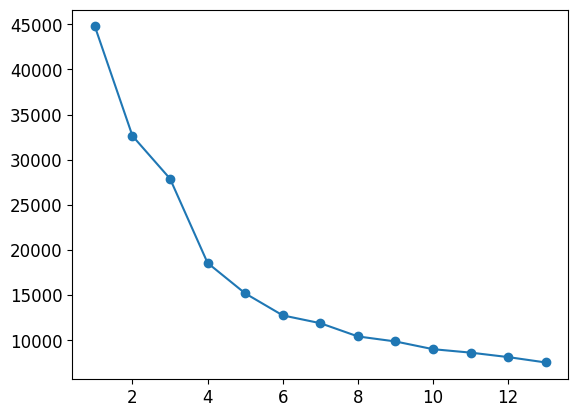

In [8]:
from sklearn.cluster import KMeans

I = []
for k in range(1, 14):
    kmeans = KMeans(n_init='auto', n_clusters=k).fit(df)
    I.append(kmeans.inertia_)

plt.plot(list(range(1,14)), I, marker='o') 

# 결과 상 4개나 6개의 군집이 적당할 것으로 보여진다.

In [9]:
n_cluster = 4
model = KMeans(n_init='auto', n_clusters=n_cluster, random_state=0)
distances = model.fit_transform(df) #해당 열 데이터의 각 cluster center와의 거리.
kmeans_result = model.labels_ #각 데이터의 군집 반환

#타당성 평가
from sklearn.metrics import silhouette_score, completeness_score
print('silhouette score : %.3f' %silhouette_score(df, kmeans_result))

silhouette score : 0.422


적정한 eps 정하기:


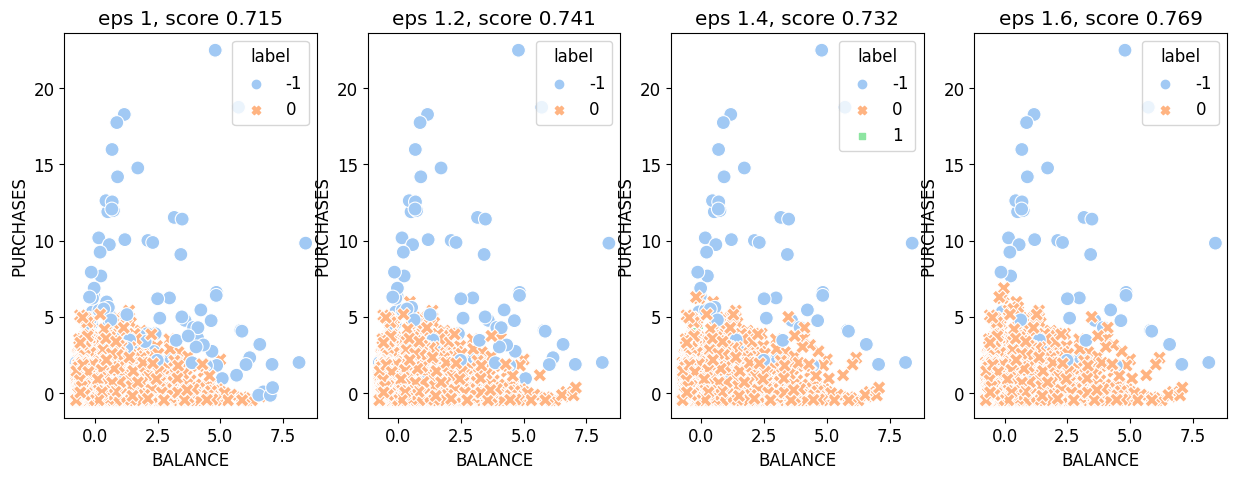

In [10]:
from sklearn.cluster import DBSCAN
import seaborn as sns

# 적정한 eps 정하기
print('적정한 eps 정하기:')
eps_list =[1, 1.2, 1.4, 1.6]
plt.rcParams['font.size']=12

fig, axes = plt.subplots(1,4, figsize=(15,5))
for ax, eps in zip(axes, eps_list):
    db = DBSCAN(eps=eps, min_samples=5).fit(df)
    temp_df = df.copy()
    temp_df['label']=db.labels_
    sns.scatterplot(x='BALANCE', y='PURCHASES', data=temp_df, ax=ax, hue='label', style='label', s=100, palette='pastel')
    score=silhouette_score(df, db.labels_)
    ax.set_title('eps {}, score {:.3f}'.format(eps, score) )
    
plt.show()

#

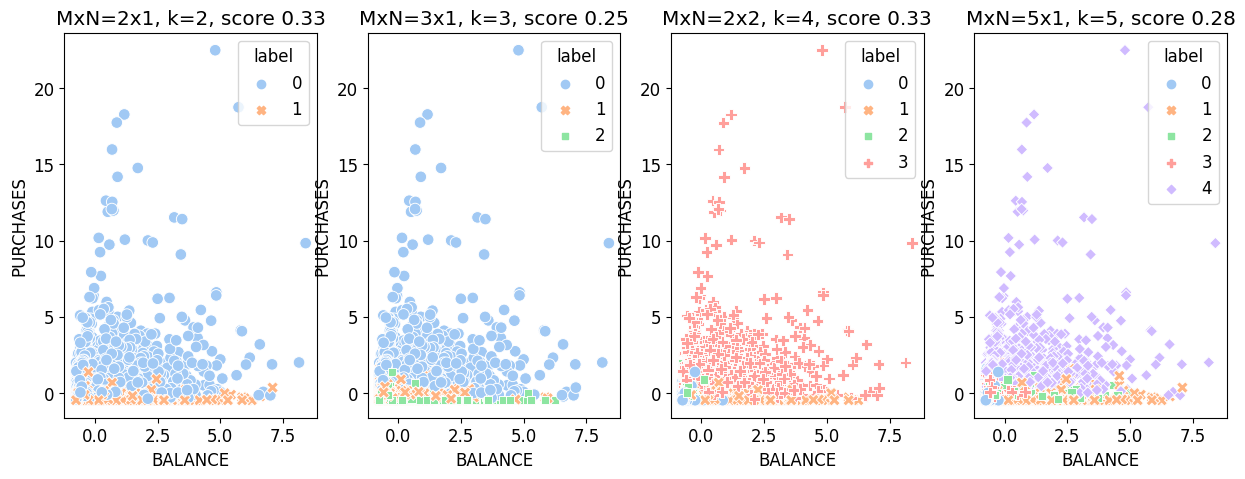

In [11]:
from sklearn_som.som import SOM
from collections import Counter

#적정한 네트워크의 크기 구하기
mn_list=[(2,1),(3,1),(2,2),(5,1)]
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for ax, (M,N) in zip(axes, mn_list):
    som = SOM(m=M, n=N, dim=df.shape[1])    #dim은 입력 데이터의 feature 개수
    som.fit(df.values)                      #배열을 입력해야 함. df는 안됨
    labels = som.predict(df.values)
    clusterNo = len(Counter(labels))
    temp_df = df.copy()
    temp_df['label'] = som.predict(df.values)
    sns.scatterplot(x='BALANCE', y='PURCHASES', data=temp_df, hue='label', style='label', s=70, ax=ax, palette='pastel')
    score=silhouette_score(df, temp_df['label'])
    ax.set_title('MxN={}x{}, k={}, score {:.2f}'.format(M,N,clusterNo,score))
plt.show()

In [14]:
n_cluster = 4
model = KMeans(n_init='auto', n_clusters=n_cluster, random_state=0)
distances = model.fit_transform(df) #해당 열 데이터의 각 cluster center와의 거리.
kmeans_result = model.labels_ #각 데이터의 군집 반환

retdf = pd.DataFrame(data, columns=data.columns)

retdf['cluster'] = kmeans_result
retdf.cluster.value_counts()

cluster
1    3581
3    3477
2    1481
0     411
Name: count, dtype: int64

In [16]:
sumdf = pd.DataFrame()
sumdf['cluster0'] = retdf[retdf.cluster==0].describe().round(2).loc['mean']
sumdf['cluster1'] = retdf[retdf.cluster==1].describe().round(2).loc['mean']
sumdf['cluster2'] = retdf[retdf.cluster==2].describe().round(2).loc['mean']
sumdf['cluster3'] = retdf[retdf.cluster==3].describe().round(2).loc['mean']

sumdf

,cluster0,cluster1,cluster2,cluster3
BALANCE,3949.42,1061.86,155.13,2400.50
BALANCE_FREQUENCY,0.99,0.97,0.40,0.98
PURCHASES,7357.12,1293.55,351.92,230.52
PURCHASES_FREQUENCY,0.96,0.87,0.28,0.13
PURCHASES_TRX,95.29,21.68,4.42,2.38
cluster,0.00,1.00,2.00,3.00


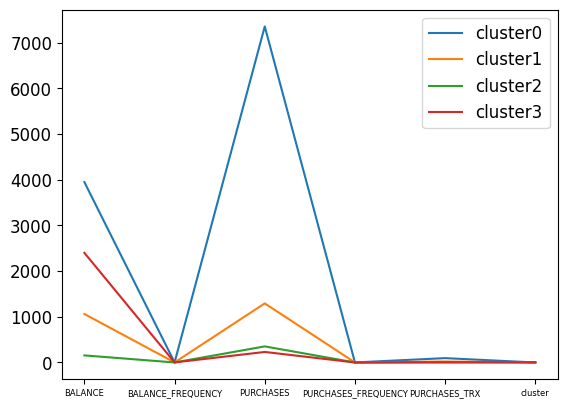

In [19]:
plt.plot(sumdf)
plt.legend(sumdf.columns)

plt.rc('xtick', labelsize=3)
plt.show()

In [20]:
# 고객 특성이 다음과 같을 때, 어느 군집에 해당하겠는가?
#   BALANCE : 3000
#   BALANCE Frequency : 1
#   Purchases : 6000
#   Purchases Frequency : 1
#   Purchases Trx : 100
model.predict( ss.transform( [[3000, 1, 6000, 1, 100]] ) )

c:\Users\lsel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# 여러 군집들 중에서도 군집 0을 메인 타겟으로 한 마케팅 전략을 제안한다. 
# 군집 0에 해당하는 고객들은 전체 39%를 차지하여 규모가 클 뿐만 아니라,
# 구매액, 구매빈도, 계좌업데이트 빈도 등을 미루어볼 때 구매력이 큰 집단으로 판단되기 때문이다.